In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('ticks')

In [3]:
who_dir = 'who_covid_19_sit_rep_time_series'
csse_dir = 'csse_covid_19_time_series'

csse_confirmed = pd.read_csv(os.path.join(csse_dir, 'time_series_19-covid-Confirmed.csv'))
csse_deaths = pd.read_csv(os.path.join(csse_dir, 'time_series_19-covid-Deaths.csv'))
csse_recovered = pd.read_csv(os.path.join(csse_dir, 'time_series_19-covid-Recovered.csv'))
who_cases = pd.read_csv(os.path.join(who_dir, 'who_covid_19_sit_rep_time_series.csv'))

csse_confirmed.drop(columns=['Lat', 'Long'], inplace=True)
csse_confirmed.groupby('Country/Region').sum()
csse_confirmed.columns

Index(['Province/State', 'Country/Region', '1/22/20', '1/23/20', '1/24/20',
       '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20', '1/30/20',
       '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20',
       '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20'],
      dtype='object')

In [4]:
pop = pd.read_csv('worldbank_population_data.csv', header=2)

years = np.arange(1960, 2020)[::-1]
latest_pop = pop['2019']
for year in years:
    latest_pop = latest_pop.fillna(pop[str(year)])
pop['latest_pop'] = latest_pop

popdata = pop[['Country Name', 'latest_pop']]

Confirmed Covid-19 cases per 100 inhabitants (Popsize >= 1000000)


<Figure size 432x288 with 0 Axes>

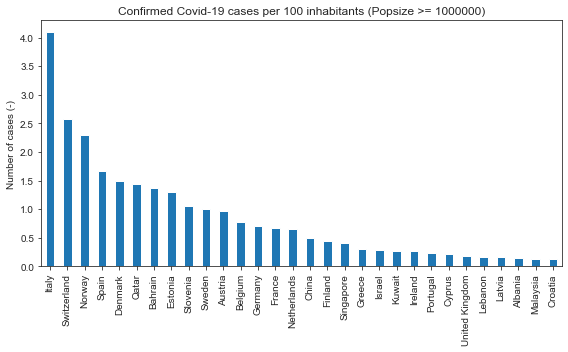

In [23]:
df_merged_dummy = pd.merge(csse_confirmed, popdata, 
                     left_on='Country/Region', right_on='Country Name')
df_merged = df_merged_dummy.drop(columns=['Province/State', 'Country/Region'])
cols = df_merged.columns.to_list()
cols = cols[-2:] + cols[:-2]
df_merged = df_merged[cols]
df_merged
#df_merged.sort_values('3/15/20', ascending=False)

per_inhabitants = 100
df_merged['3/15/20_rel_to_latestpop'] = (df_merged['3/15/20'] / df_merged['latest_pop']) * per_inhabitants

# countries over 1 Mio inhabitants
cap = 1000000
if cap is not None:
    df_merged = df_merged[df_merged['latest_pop'] >= cap]
    title = 'Confirmed Covid-19 cases per ' \
            '{} inhabitants (Popsize >= {})'.format(per_inhabitants, cap)
    fname = 'confirmed_covid19_cases_per{}inhabitants_popsize{}.png'.format(per_inhabitants, cap)
else:
    title = 'Confirmed Covid-19 cases per ' \
            '{} inhabitants'.format(per_inhabitants)
    fname = 'confirmed_covid19_cases_per{}inhabitants.png'.format(per_inhabitants)

# sort
df_sorted = df_merged.sort_values('3/15/20_rel_to_latestpop', ascending=False)
df_sorted = df_sorted.head(30)

# scale to percent
df_sorted['3/15/20_rel_to_latestpop'] = df_sorted['3/15/20_rel_to_latestpop'] * 100

# plots
# -------
print(title)

# normal
plt.figure()
df_sorted.plot.bar(x='Country Name', y='3/15/20_rel_to_latestpop',
                   figsize=(8, 5), logy=False, legend=False)
plt.ylabel('Number of cases (-)')
plt.xlabel(None)
plt.title(title)
plt.tight_layout()
plt.savefig(os.path.join('/Users/felix/ETH/code/bd4pp/covid/plots/', fname),
            format='png', dpi=300)

# logy
# plt.figure()
# df_sorted.plot.bar(x='Country Name', y='3/15/20_rel_to_latestpop',
#                    figsize=(20,10), logy=True, legend=False)
# plt.ylabel('Cases (log-scale)')
# plt.title(title)
# plt.tight_layout()
# plt.savefig(os.path.join('/Users/felix/ETH/code/bd4pp/covid/plots/', fname),
#             format='png', dpi=300)

In [8]:
# try:
#     who_cases = who_cases.drop(columns=['Province/States', 'WHO region'])
# except KeyError as e:
#     print(e)
# who_cases
# 
# df_merged = pd.merge(who_cases, popdata, 
#                      left_on='Country/Region', right_on='Country Name')
# df_merged = df_merged.drop('Country/Region', axis=1)
# latest_pop = df_merged['latest_pop']
# df_merged = df_merged.groupby('Country Name').sum()
# df_merged['latest_pop'] = latest_pop
# cols = df_merged.columns.to_list()
# cols = cols[-2:] + cols[:-2]
# df_merged = df_merged[cols]
# df_merged
# #df_merged.sort_values('3
# 
# df_merged.sort_values('3/5/2020', ascending=False)
# who_cases